In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifelines
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 200)
plt.rcParams['figure.figsize']=(15,7)

In [13]:
from lifelines.datasets import load_dd
data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [14]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [15]:
kmf.fit(data.duration,event_observed=data.observed)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

Text(0.5, 1.0, 'Survival function of political regimes')

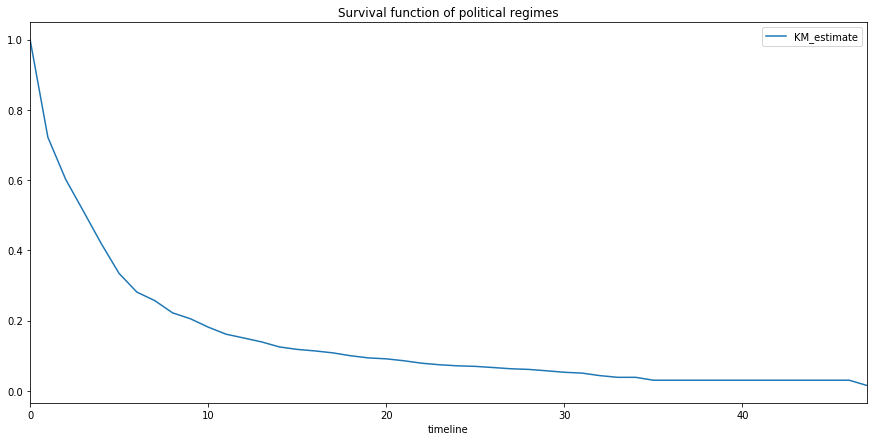

In [16]:
kmf.survival_function_.plot()
plt.title('Survival function of political regimes')

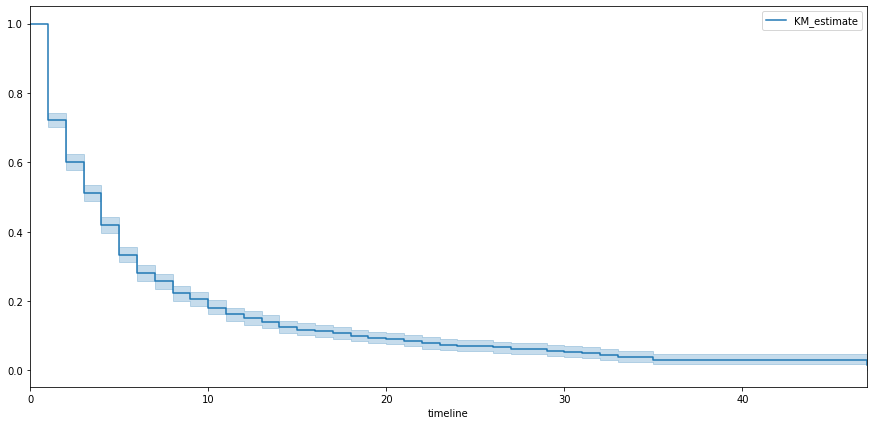

In [17]:
kmf.plot()

In [18]:
kmf.median_

4.0

In [20]:
T=data.duration
E=data.observed

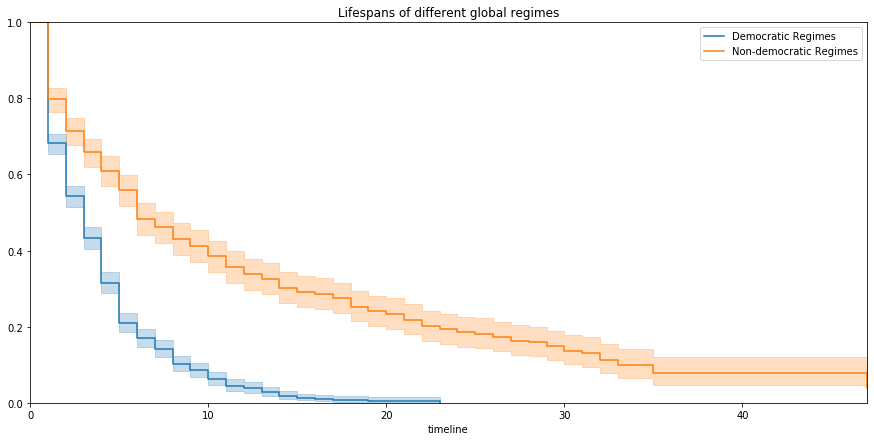

In [21]:
ax = plt.subplot(111)
dem = (data["democracy"] == "Democracy")
kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot(ax=ax)
kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax)
plt.ylim(0, 1);
plt.title("Lifespans of different global regimes");

Median survival time of democratic: 3.0
Median survival time of non-democratic: 6.0


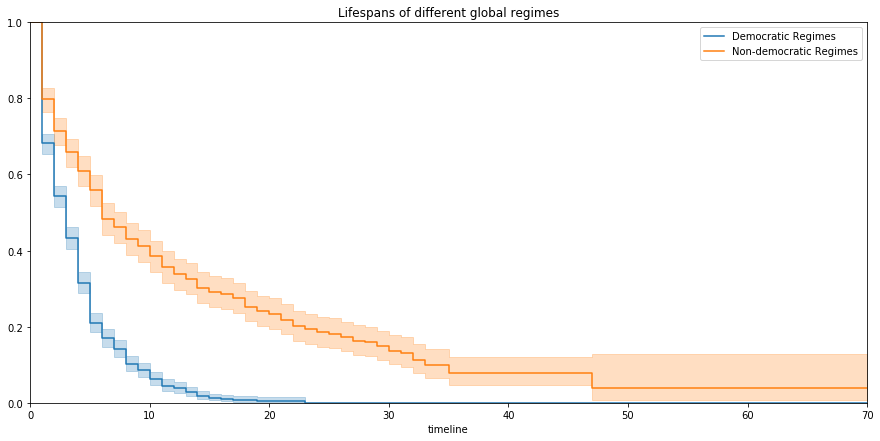

In [29]:
ax = plt.subplot(111)

t = np.linspace(0, 70, 71)
kmf.fit(T[dem], event_observed=E[dem], timeline=t, label="Democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of democratic:", kmf.median_)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, label="Non-democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of non-democratic:", kmf.median_)

plt.ylim(0, 1)
plt.title("Lifespans of different global regimes");


In [31]:
from lifelines.statistics import logrank_test

results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
 test_statistic      p  -log2(p)
         260.47 <0.005    192.23


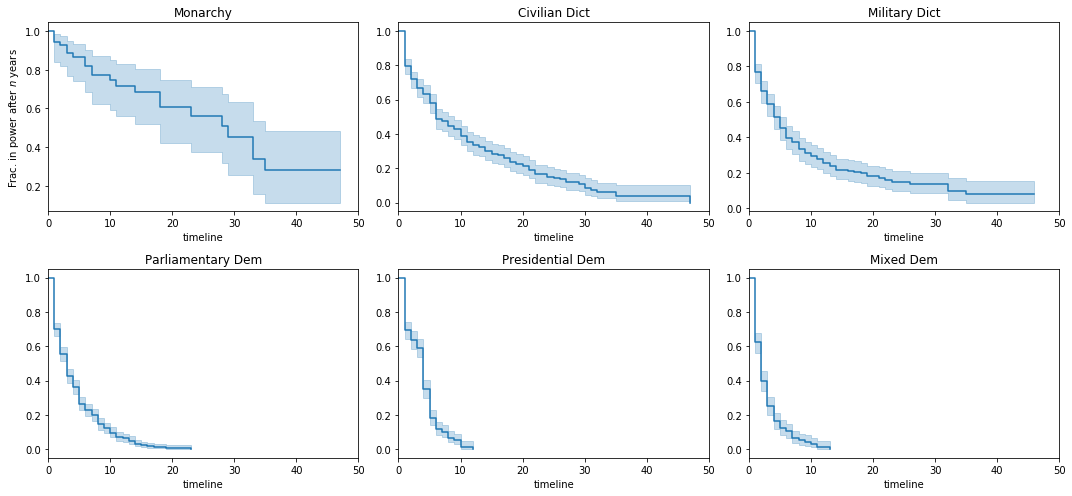

In [30]:
regime_types = data['regime'].unique()

for i, regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i + 1)

    ix = data['regime'] == regime_type
    kmf.fit(T[ix], E[ix], label=regime_type)
    kmf.plot(ax=ax, legend=False)

    plt.title(regime_type)
    plt.xlim(0, 50)

    if i==0:
        plt.ylabel('Frac. in power after $n$ years')

plt.tight_layout()

In [33]:
T = data["duration"]
E = data["observed"]

In [32]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T,event_observed=E)

<lifelines.NelsonAalenFitter: fitted with 1808 observations, 340 censored>

In [36]:
naf.cumulative_hazard_.head()

,NA_estimate
timeline,
0.0,0.000000
1.0,0.325912
2.0,0.507356
3.0,0.671251
4.0,0.869867


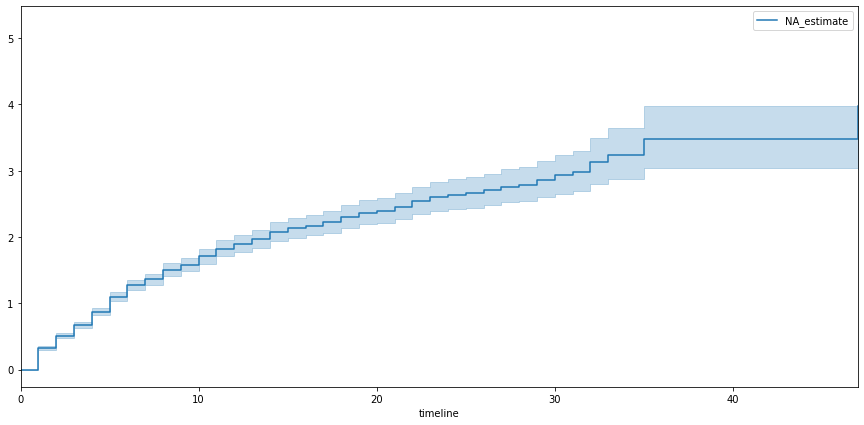

In [35]:
naf.plot()

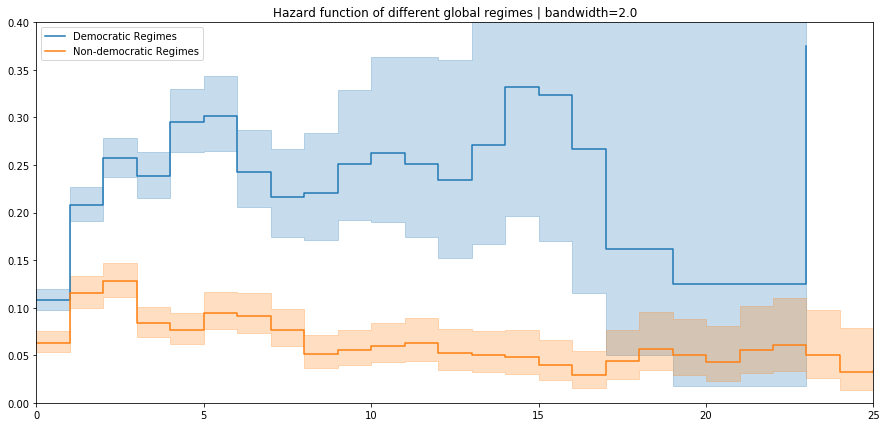

In [40]:
bandwidth = 2

naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot_hazard(bandwidth=bandwidth)

naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot_hazard(ax=ax, bandwidth=bandwidth)

plt.title("Hazard function of different global regimes | bandwidth=%.1f" % bandwidth);
plt.ylim(0, 0.4)
plt.xlim(0, 25);